# 20160928 MBB - BULL CREDIT SPREAD

In [1]:
import sys
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\options\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PlotSignal\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PrintPlot\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PlotSignal\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\Options\src')
trade_data_path = r'E:\Datos\jupyter notebooks\trading\\'
from PlotSignal.Csv_mngt import Csv_mngt
from  PlotSignal.PrintPlot import PrintPlot
from PlotSignal.PrintTrading import PrintTrading
import numpy as np
import mpld3
from datetime import datetime
from matplotlib.dates import  date2num
from Options.Value import Calculate
%matplotlib inline
mpld3.enable_notebook()

## ENTRY

### BUY LEG 

#### ENTRY DATA BUY LEG

In [2]:
csv_file = '20160928 UNG.csv'

data_csv = Csv_mngt()
data_csv.set_data(trade_data_path + csv_file,';')

option_buy = data_csv.extract_data_row('FIELD','option_buy','VALUE')
print('option_buy = ' + option_buy)
option_path_buy=data_csv.extract_data_row('FIELD','option_path_buy','VALUE')
print('option_path_buy = ' + option_path_buy)
option_type = data_csv.extract_data_row('FIELD','option_type','VALUE')
print('option_type = ' + option_type)
strike_buy = float(data_csv.extract_data_row('FIELD','strike_buy','VALUE').replace(',','.'))
print('strike_buy = ' + str(strike_buy))
expiration = datetime(int(data_csv.extract_data_row('FIELD','expiration_yy','VALUE')),
                      int(data_csv.extract_data_row('FIELD','expiration_mm','VALUE')),
                      int(data_csv.extract_data_row('FIELD','expiration_dd','VALUE')), 16, 0, 0)
print('expiration = ' + str(expiration))
premium_buy = float(data_csv.extract_data_row('FIELD','premium_buy','VALUE').replace(',','.'))
print('premium_buy = ' + str(premium_buy))
underlying_buy = float(data_csv.extract_data_row('FIELD','underlying_buy','VALUE').replace(',','.'))
print('underlying_buy = ' + str(underlying_buy))
entry_date_buy = datetime(int(data_csv.extract_data_row('FIELD','entry_date_buy_yy','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_buy_mm','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_buy_dd','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_buy_HH','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_buy_MM','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_buy_SS','VALUE')))
print('entry_date_buy = ' + str(entry_date_buy))
trading_day_buy = entry_date_buy.date()
print('trading_day_buy = ' + str(trading_day_buy))
ticker = data_csv.extract_data_row('FIELD','ticker','VALUE')
print('ticker = ' + str(ticker))
historical_volatility_buy = float(data_csv.extract_data_row('FIELD','historical_volatility_buy','VALUE').replace(',','.'))
print('historical_volatility_buy = ' + str(historical_volatility_buy))

option_buy = 20160928 +UNG-161021P8.00
option_path_buy = E:\\Datos\\bolsa\\cuenta personal\\analisis de valores\\Trades activos\\Scanning\\20160928\\20160928
option_type = put
strike_buy = 8.0
expiration = 2016-10-21 16:00:00
premium_buy = 0.13
underlying_buy = 8.515
entry_date_buy = 2016-09-28 10:46:14
trading_day_buy = 2016-09-28
ticker = UNG
historical_volatility_buy = 0.3085


In [3]:
# get data
csv = Csv_mngt()
csv.set_data(option_path_buy + '\\Opciones\\' + option_buy + '.txt',';')
bid_str = csv.extract_data_col('Bid Underlier')
bid_list = np.asarray([float(x.replace(',','.')) for x in bid_str])
ask_str = csv.extract_data_col('Ask Underlier')
ask_list = np.asarray([float(x.replace(',','.')) for x in ask_str])
target_str = csv.extract_data_col('Target')
clean_target_str = []
for each in target_str:
    if each:
        clean_target_str.append(each)
    else:
        clean_target_str.append('0')
target_list = np.asarray([float(x.replace(',','.')) for x in clean_target_str])
time_list = csv.date2num_list(csv.extract_data_col('Time'), '%H:%M:%S')-0.25 
time_list = time_list - int(time_list[0]) + date2num(trading_day_buy)
under_price = (bid_list + ask_list) / 2
premium_bid_str = csv.extract_data_col('Bid')
premium_bid = np.asarray([float(x.replace(',','.')) for x in premium_bid_str])
premium_ask_str = csv.extract_data_col('Ask')
premium_ask = np.asarray([float(x.replace(',','.')) for x in premium_ask_str])
for i,v in enumerate(time_list):
    if date2num(entry_date_buy) <= v:
        break
if not i:
    i=1
ask_price_buy = premium_ask[i-1]
print(ask_price_buy)

0.13


#### UNDERLYING BUY LEG

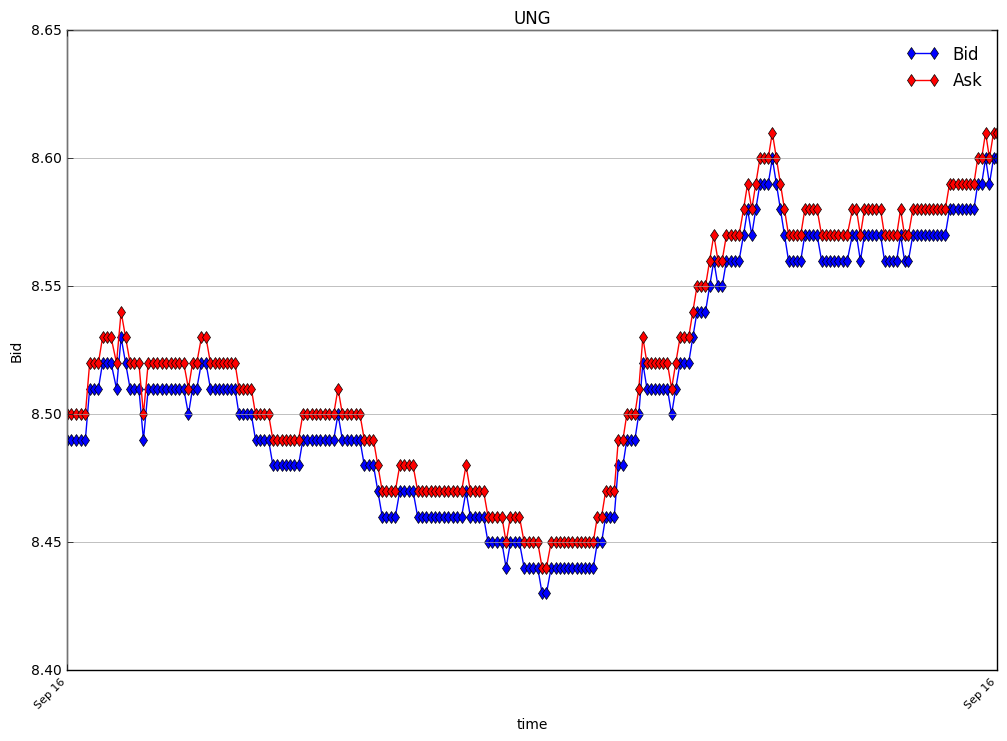

In [4]:

graph = PrintPlot(time_list, bid_list)
graph.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph.append_trace(ask_list, 'rd-', 'Ask')
graph.show()


#### TRADING BUY LEG

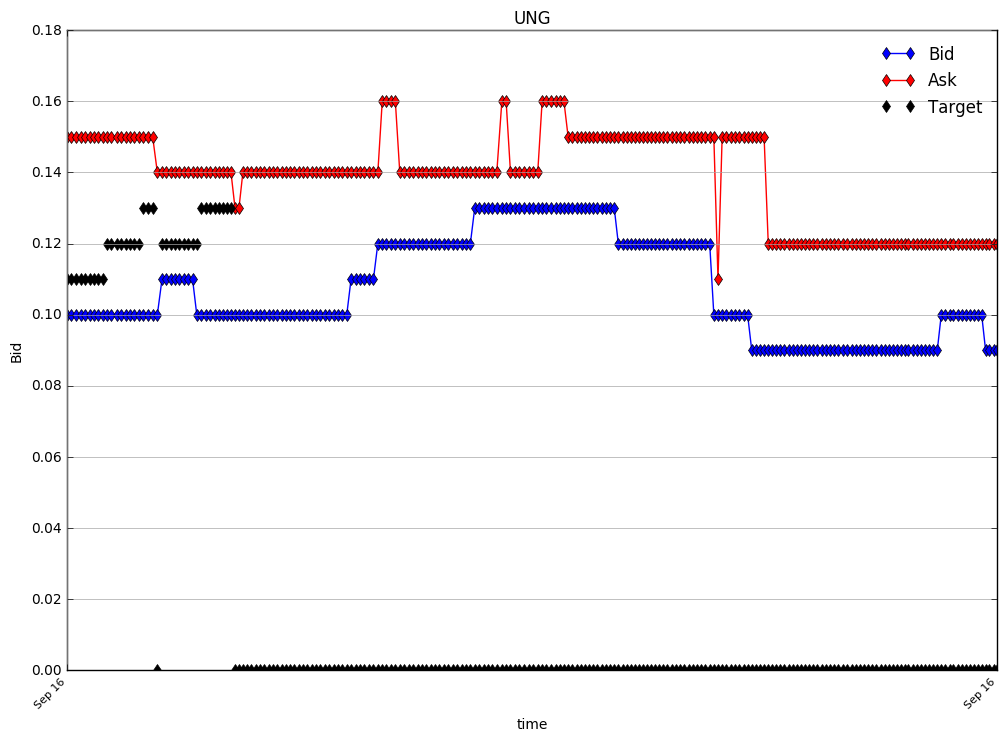

In [5]:
graph_trading_buy = PrintPlot(time_list, premium_bid)
graph_trading_buy.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph_trading_buy.append_trace(premium_ask, 'rd-', 'Ask')
graph_trading_buy.append_trace(target_list, 'kd', 'Target')
graph_trading_buy.show()

#### IMPLIED VOLATILITY BUY LEG

23.21789351850748
8.0
8.515
0.13
put
(736235.4487731481, 0.39100000000000001)


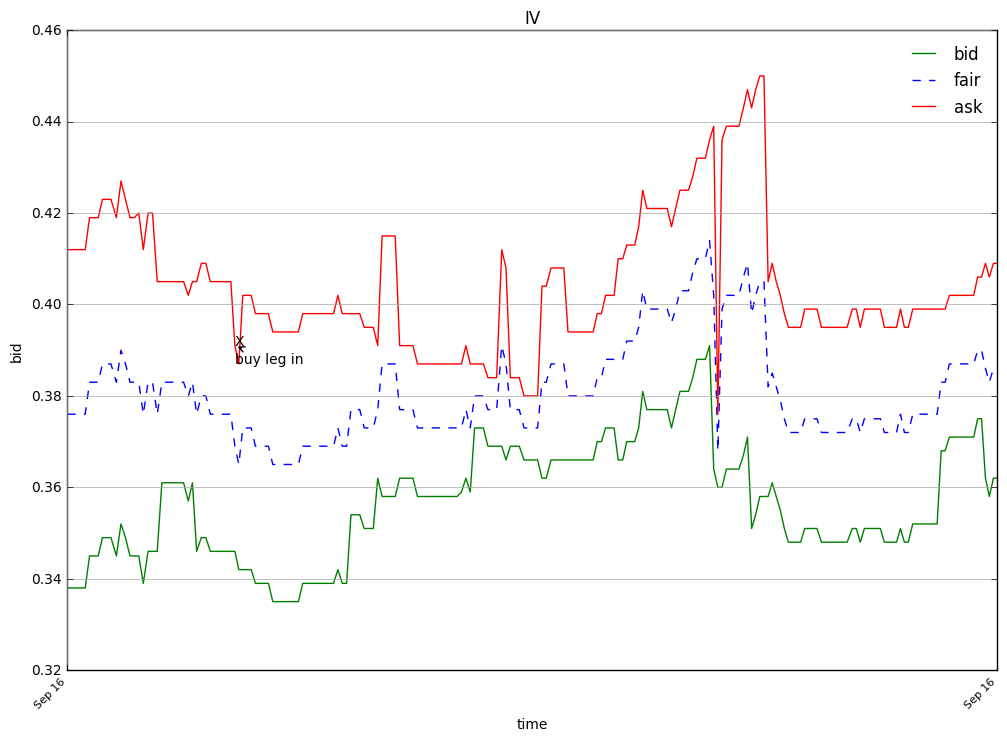

In [6]:
# buy leg implied volatility
graph_IV_buy = PrintTrading()
graph_IV_buy.print_IV(option_type, premium_bid, under_price, strike_buy, time_list, expiration, data_name = 'bid',
                     trace_type = 'g-')
time_leg_IV_in = date2num(entry_date_buy)
time_to_exp = date2num(expiration)-date2num(entry_date_buy)
print(time_to_exp)
print(strike_buy)
print(underlying_buy)
print(premium_buy)
print(option_type)
buy_leg_IV_in = Calculate().find_IV(option_type, premium_buy, underlying_buy, strike_buy, time_to_exp)
xy = (date2num(entry_date_buy), buy_leg_IV_in)
print(xy)
xy_text = (date2num(entry_date_buy), buy_leg_IV_in * 0.99)

graph_IV_buy.annotate('buy leg in', xy, xy_text)
graph_IV_buy.text('X', date2num(entry_date_buy), buy_leg_IV_in)
premium_trade = (premium_bid + premium_ask) / 2
graph_IV_buy.add_IV(option_type, premium_trade, under_price, strike_buy, time_list, expiration, data_name = 'fair',
                     trace_type = 'b--')
graph_IV_buy.add_IV(option_type, premium_ask, under_price, strike_buy, time_list, expiration, data_name = 'ask',
                     trace_type = 'r-')
graph_IV_buy.show()


#### IMPLIED VOLATILITY CALCULATED BUY LEG

In [7]:
# Buy_leg, IV
print('IV of buy leg in = ' + str(buy_leg_IV_in) + '    premium buy leg = ' + str(premium_buy))
print('\nPremium market buy = ' + '{0:.2f}'.format(ask_price_buy))
premium_historical_buy = Calculate().value(option_type, underlying_buy, strike_buy, date2num(expiration) - 
                                           date2num(entry_date_buy), historical_volatility_buy, 0.01, 0)
print('\nHistorical volatility buy = ' + str(historical_volatility_buy) +
      '    premium HV buy = ' + '{0:.2f}'.format(premium_historical_buy))

IV of buy leg in = 0.391    premium buy leg = 0.13

Premium market buy = 0.13

Historical volatility buy = 0.3085    premium HV buy = 0.08


### WRITE LEG

   #### ENTRY DATA WRITE LEG

In [8]:
data_csv = Csv_mngt()
data_csv.set_data(trade_data_path + csv_file,';')

option_write = data_csv.extract_data_row('FIELD','option_write','VALUE')
print('option_write = ' + option_write)
option_path_write=data_csv.extract_data_row('FIELD','option_path_write','VALUE')
print('option_path_write = ' + option_path_write)
strike_write = float(data_csv.extract_data_row('FIELD','strike_write','VALUE').replace(',','.'))
print('strike_write = ' + str(strike_write))
premium_write = float(data_csv.extract_data_row('FIELD','premium_write','VALUE').replace(',','.'))
print('premium_write = ' + str(premium_write))
underlying_write = float(data_csv.extract_data_row('FIELD','underlying_write','VALUE').replace(',','.'))
print('underlying_write = ' + str(underlying_write))
entry_date_write = datetime(int(data_csv.extract_data_row('FIELD','entry_date_write_yy','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_write_mm','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_write_dd','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_write_HH','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_write_MM','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_write_SS','VALUE')))
print('entry_date_write = ' + str(entry_date_write))
trading_day_write = entry_date_write.date()
print('trading_day_write = ' + str(trading_day_write))
historical_volatility_write = float(data_csv.extract_data_row('FIELD','historical_volatility_write','VALUE').replace(',','.'))
print('historical_volatility_write = ' + str(historical_volatility_write))

option_write = 20160928 +UNG-161021P9.00
option_path_write = E:\\Datos\\bolsa\\cuenta personal\\analisis de valores\\Trades activos\\Scanning\\20160928\\20160928
strike_write = 9.0
premium_write = -0.65
underlying_write = 8.465
entry_date_write = 2016-09-28 13:24:38
trading_day_write = 2016-09-28
historical_volatility_write = 0.3085


In [9]:
# get data
csv = Csv_mngt()
csv.set_data(option_path_write + '\\Opciones\\' + option_write + '.txt',';')
bid_str = csv.extract_data_col('Bid Underlier')
bid_list = np.asarray([float(x.replace(',','.')) for x in bid_str])
ask_str = csv.extract_data_col('Ask Underlier')
ask_list = np.asarray([float(x.replace(',','.')) for x in ask_str])
target_str = csv.extract_data_col('Target')
clean_target_str = []
for each in target_str:
    if each:
        clean_target_str.append(each)
    else:
        clean_target_str.append('0')
target_list = np.asarray([float(x.replace(',','.')) for x in clean_target_str])
time_list = csv.date2num_list(csv.extract_data_col('Time'), '%H:%M:%S')-0.25
time_list = time_list - int(time_list[0]) + date2num(trading_day_write)
under_price = (bid_list + ask_list) / 2
premium_bid_str = csv.extract_data_col('Bid')
premium_bid = np.asarray([float(x.replace(',','.')) for x in premium_bid_str])
premium_ask_str = csv.extract_data_col('Ask')
premium_ask = np.asarray([float(x.replace(',','.')) for x in premium_ask_str])
for i,v in enumerate(time_list):
    if date2num(entry_date_write) <= v:
        break
if not i:
    i=1
bid_price_write = premium_bid[i-1]
print(bid_price_write)

0.65


#### UNDERLYING WRITE LEG

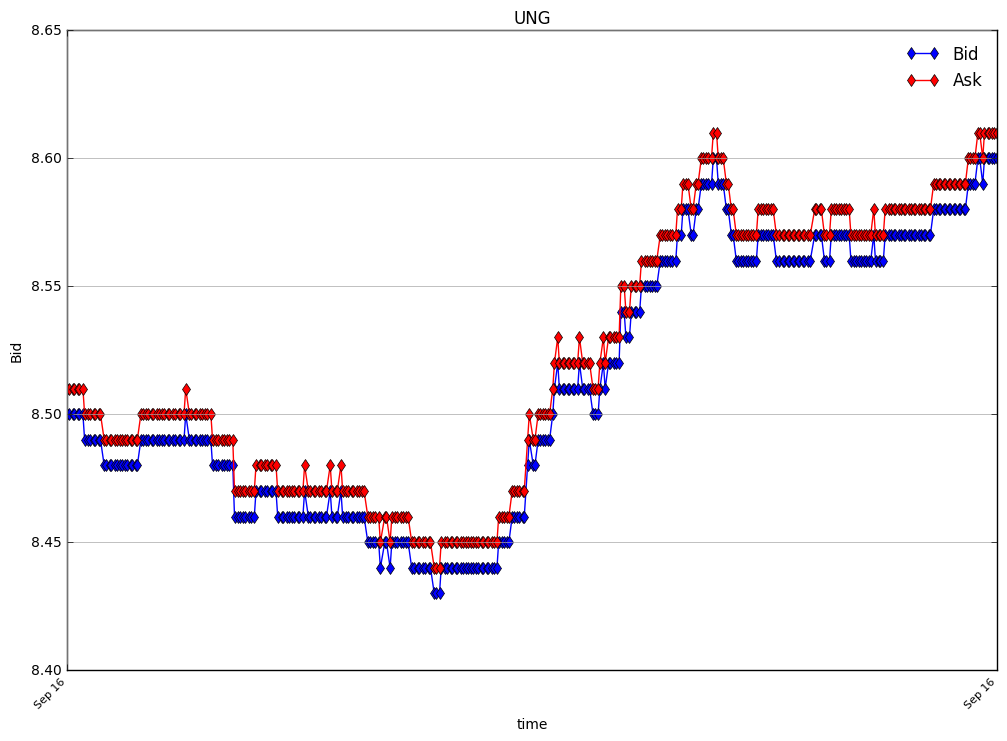

In [10]:
graph = PrintPlot(time_list, bid_list)
graph.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph.append_trace(ask_list, 'rd-', 'Ask')
graph.show()


#### TRADING WRITE LEG

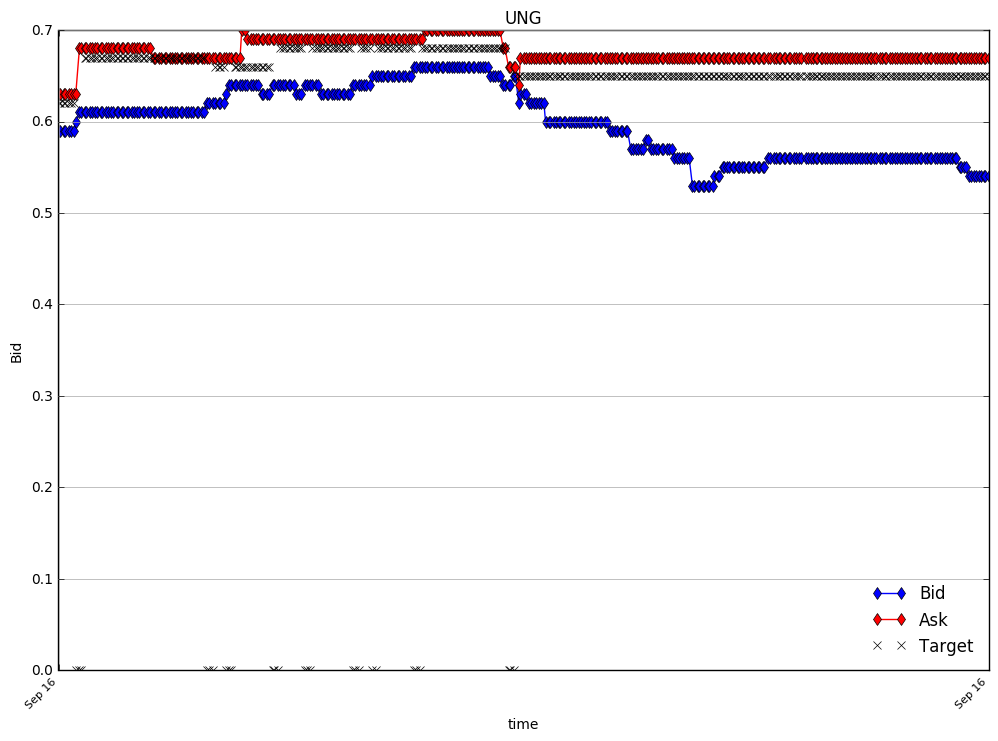

In [11]:
graph_trading_buy = PrintPlot(time_list, premium_bid)
graph_trading_buy.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph_trading_buy.append_trace(premium_ask, 'rd-', 'Ask')
graph_trading_buy.append_trace(target_list, 'kx', 'Target')
graph_trading_buy.show()

### IMPLIED VOLATILITY WRITE LEG

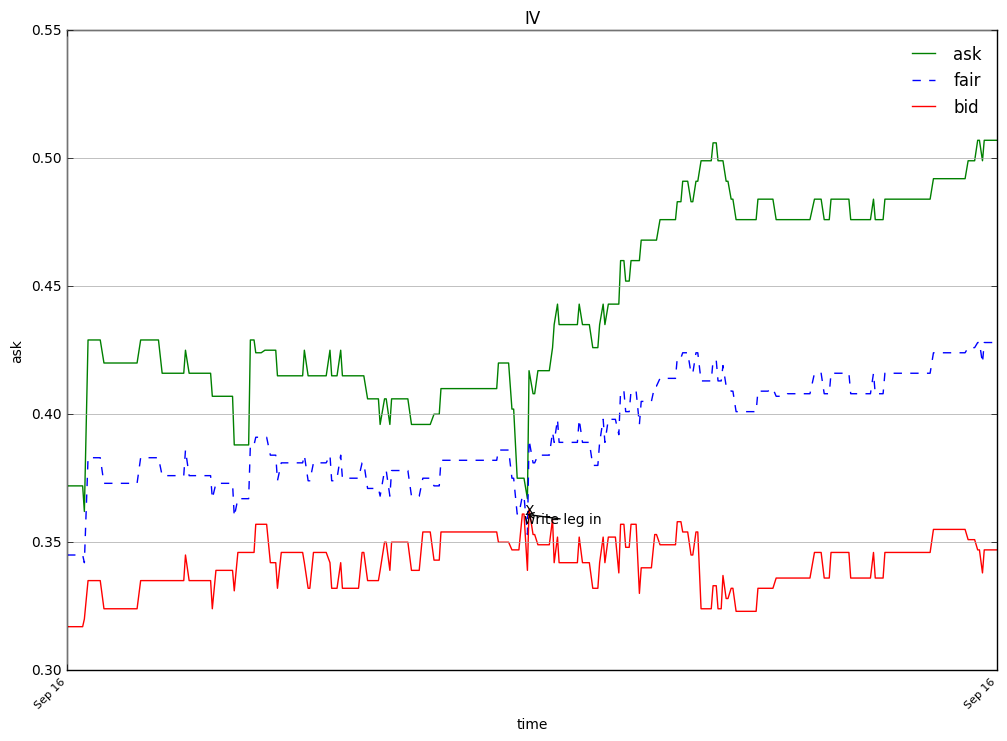

In [12]:
# buy leg implied volatility
graph_IV_write = PrintTrading()
graph_IV_write.print_IV(option_type, premium_ask, under_price, strike_write, time_list, expiration, data_name = 'ask',
                     trace_type = 'g-')
time_leg_IV_in = date2num(entry_date_write)
time_to_exp = date2num(expiration)-date2num(entry_date_write)
write_leg_IV_in = Calculate().find_IV(option_type, -premium_write, underlying_write, strike_write, time_to_exp)
xy = (date2num(entry_date_write), write_leg_IV_in)
xy_text = (date2num(entry_date_write), write_leg_IV_in * 0.99)
graph_IV_write.annotate('write leg in', xy, xy_text)
graph_IV_write.text('X', date2num(entry_date_write), write_leg_IV_in)
premium_trade = (premium_bid + premium_ask) / 2
graph_IV_buy.add_IV(option_type, premium_trade, under_price, strike_write, time_list, expiration, data_name = 'fair',
                     trace_type = 'b--')
graph_IV_buy.add_IV(option_type, premium_bid, under_price, strike_write, time_list, expiration, data_name = 'bid',
                     trace_type = 'r-')
graph_IV_write.show()


### IMPLIED VOLATILITY CALCULATED

In [13]:
# Write_leg, IV
print('IV of write leg in = ' + str(write_leg_IV_in))


IV of write leg in = 0.361


## EXIT
### BUY LEG
#### EXIT DATA BUY LEG

In [15]:
option_buy_exit = data_csv.extract_data_row('FIELD','option_buy_exit','VALUE')
print('option_buy_exit = ' + option_buy_exit)
option_path_buy_exit = data_csv.extract_data_row('FIELD','option_path_buy_exit','VALUE')
print('option_path_buy_exit = ' + option_path_buy_exit)
premium_buy_exit = float(data_csv.extract_data_row('FIELD','premium_buy_exit','VALUE').replace(',','.'))
print('premium_buy_exit = ' + str(premium_buy_exit))
underlying_buy_exit = float(data_csv.extract_data_row('FIELD','underlying_buy_exit','VALUE').replace(',','.'))
print('underlying_buy_exit = ' + str(underlying_buy_exit))
entry_date_buy_exit = datetime(int(data_csv.extract_data_row('FIELD','exit_date_buy_yy','VALUE')),
                      int(data_csv.extract_data_row('FIELD','exit_date_buy_mm','VALUE')),
                      int(data_csv.extract_data_row('FIELD','exit_date_buy_dd','VALUE')),
                      int(data_csv.extract_data_row('FIELD','exit_date_buy_HH','VALUE')),
                      int(data_csv.extract_data_row('FIELD','exit_date_buy_MM','VALUE')),
                      int(data_csv.extract_data_row('FIELD','exit_date_buy_SS','VALUE')))
print('entry_date_buy_exit = ' + str(entry_date_buy_exit))
trading_day_buy_exit = entry_date_buy_exit.date()
print('trading_day_buy_exit = ' + str(trading_day_buy_exit))
historical_volatility_buy_exit = float(data_csv.extract_data_row('FIELD',
                                                                 'historical_volatility_buy_exit','VALUE').replace(',','.'))
print('historical_volatility_buy_exit = ' + str(historical_volatility_buy_exit))

option_buy_exit = 20160930 +UNG-161021P8.00
option_path_buy_exit = E:\\Datos\\bolsa\\cuenta personal\\analisis de valores\\Trades activos\\Scanning\\20160930
premium_buy_exit = 0.14
underlying_buy_exit = 0.0
entry_date_buy_exit = 2016-09-30 11:00:48
trading_day_buy_exit = 2016-09-30
historical_volatility_buy_exit = 0.3062


In [25]:
# get data
csv = Csv_mngt()
csv.set_data(option_path_buy_exit + '\\Opciones\\' + option_buy_exit + '.txt',';')
bid_str = csv.extract_data_col('Bid Underlier')
for i, each in enumerate(bid_str):
    if not each:
        if i:
            bid_str[i] = bid_str[i-1]
        else:
            bid_str[i] = '0'
bid_list = np.asarray([float(x.replace(',','.')) for x in bid_str])
ask_str = csv.extract_data_col('Ask Underlier')
for i, each in enumerate(ask_str):
    if not each:
        if i:
            ask_str[i] = ask_str[i-1]
        else:
            ask_str[i] = '0'
ask_list = np.asarray([float(x.replace(',','.')) for x in ask_str])
target_str = csv.extract_data_col('Target')
clean_target_str = []
for each in target_str:
    if each:
        clean_target_str.append(each)
    else:
        clean_target_str.append('0')
target_list = np.asarray([float(x.replace(',','.')) for x in clean_target_str])
time_list = csv.date2num_list(csv.extract_data_col('Time'), '%H:%M:%S')-0.25 
time_list = time_list - int(time_list[0]) + date2num(trading_day_buy)
under_price = (bid_list + ask_list) / 2
premium_bid_str = csv.extract_data_col('Bid')
premium_bid = np.asarray([float(x.replace(',','.')) for x in premium_bid_str])
premium_ask_str = csv.extract_data_col('Ask')
premium_ask = np.asarray([float(x.replace(',','.')) for x in premium_ask_str])
for i,v in enumerate(time_list):
    if date2num(entry_date_buy_exit) <= v:
        break
if not i:
    i=1
bid_price_buy_exit = premium_bid[i-1]
print(bid_price_buy_exit)

0.12


#### UNDERLYING BUY LEG

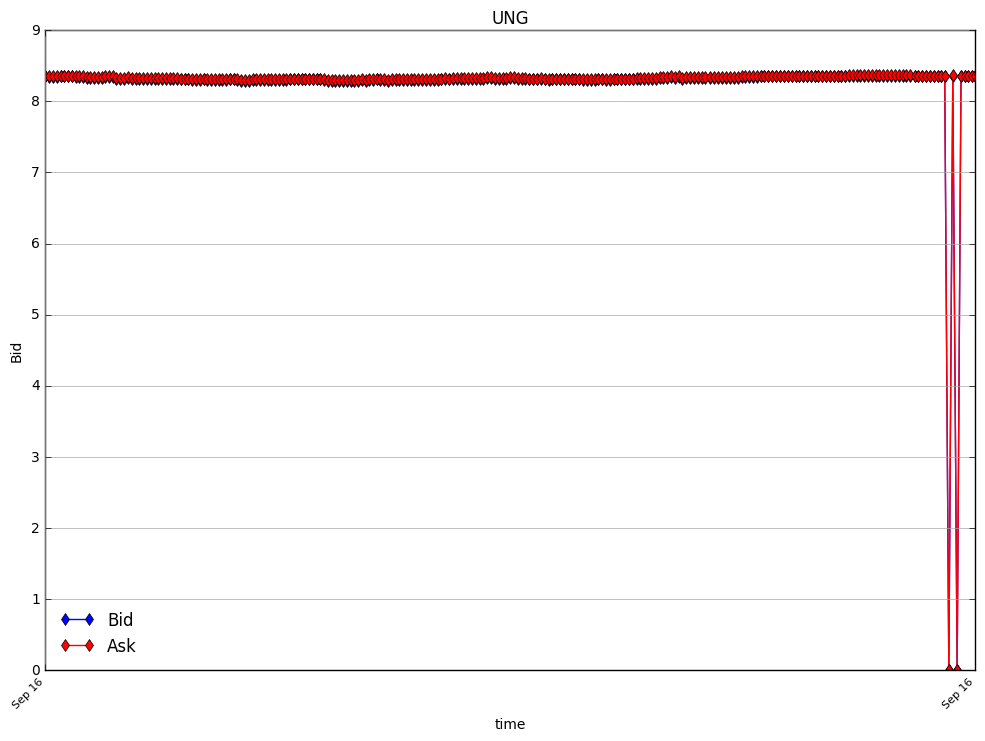

In [26]:

graph = PrintPlot(time_list, bid_list)
graph.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph.append_trace(ask_list, 'rd-', 'Ask')
graph.show()


#### TRADING BUY LEG

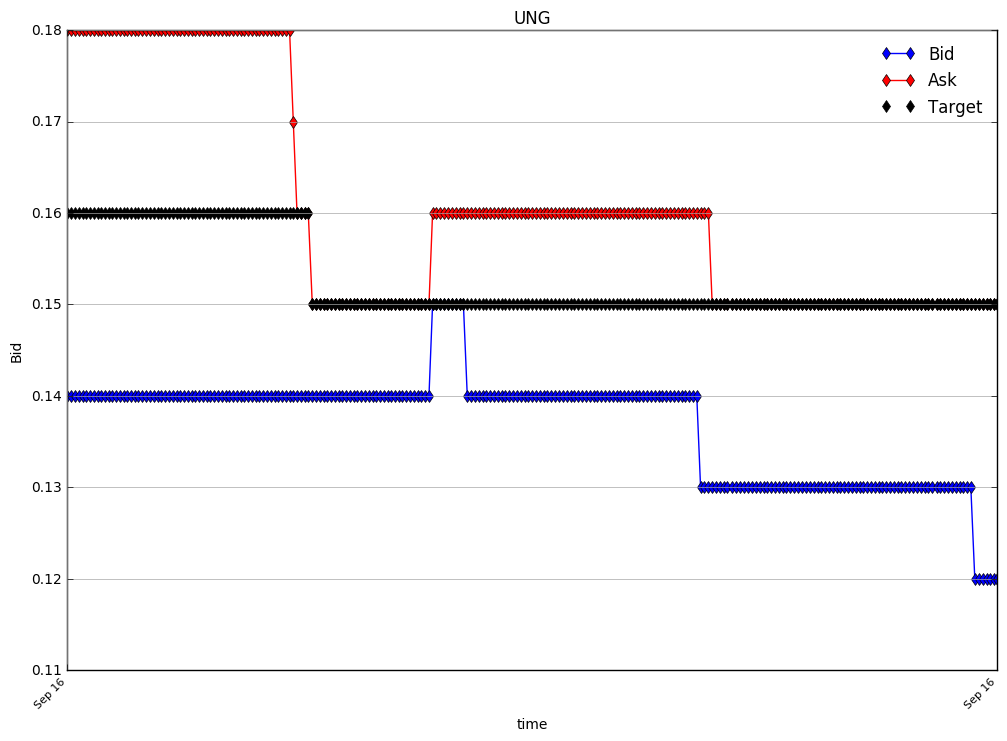

In [27]:
graph_trading_buy = PrintPlot(time_list, premium_bid)
graph_trading_buy.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph_trading_buy.append_trace(premium_ask, 'rd-', 'Ask')
graph_trading_buy.append_trace(target_list, 'kd', 'Target')
graph_trading_buy.show()

#### IMPLIED VOLATILITY BUY LEG

23.21789351850748
8.0
8.515
0.13
put
(736235.4487731481, 0.39100000000000001)


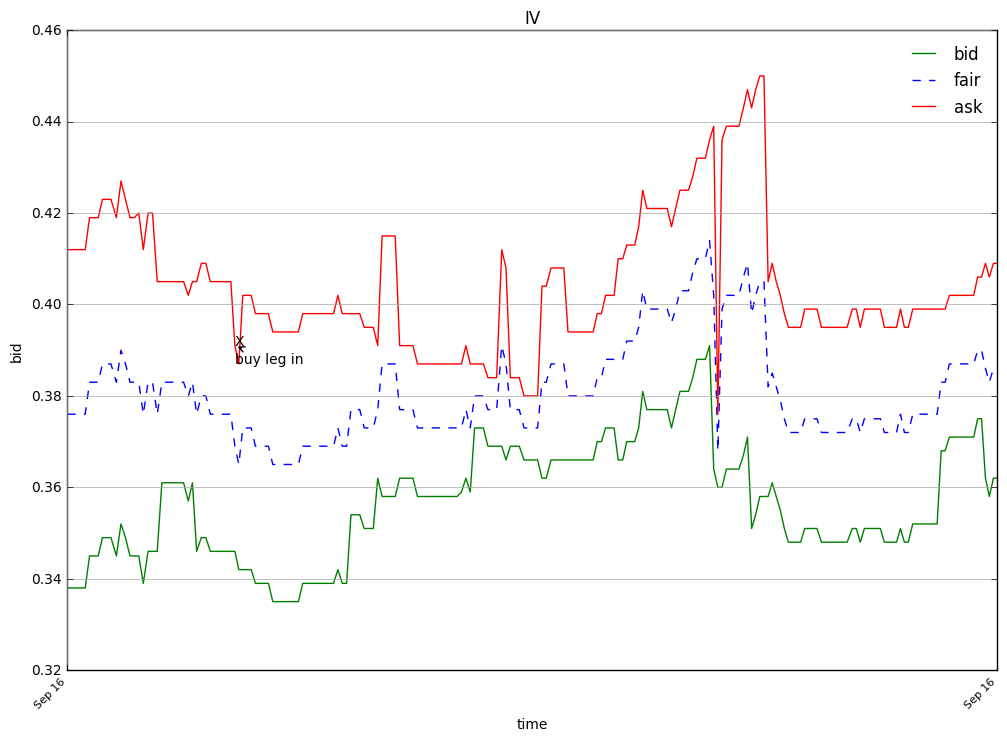

In [6]:
# buy leg implied volatility
graph_IV_buy = PrintTrading()
graph_IV_buy.print_IV(option_type, premium_bid, under_price, strike_buy, time_list, expiration, data_name = 'bid',
                     trace_type = 'g-')
time_leg_IV_in = date2num(entry_date_buy)
time_to_exp = date2num(expiration)-date2num(entry_date_buy)
print(time_to_exp)
print(strike_buy)
print(underlying_buy)
print(premium_buy)
print(option_type)
buy_leg_IV_in = Calculate().find_IV(option_type, premium_buy, underlying_buy, strike_buy, time_to_exp)
xy = (date2num(entry_date_buy), buy_leg_IV_in)
print(xy)
xy_text = (date2num(entry_date_buy), buy_leg_IV_in * 0.99)

graph_IV_buy.annotate('buy leg in', xy, xy_text)
graph_IV_buy.text('X', date2num(entry_date_buy), buy_leg_IV_in)
premium_trade = (premium_bid + premium_ask) / 2
graph_IV_buy.add_IV(option_type, premium_trade, under_price, strike_buy, time_list, expiration, data_name = 'fair',
                     trace_type = 'b--')
graph_IV_buy.add_IV(option_type, premium_ask, under_price, strike_buy, time_list, expiration, data_name = 'ask',
                     trace_type = 'r-')
graph_IV_buy.show()


#### IMPLIED VOLATILITY CALCULATED BUY LEG

In [7]:
# Buy_leg, IV
print('IV of buy leg in = ' + str(buy_leg_IV_in) + '    premium buy leg = ' + str(premium_buy))
print('\nPremium market buy = ' + '{0:.2f}'.format(ask_price_buy))
premium_historical_buy = Calculate().value(option_type, underlying_buy, strike_buy, date2num(expiration) - 
                                           date2num(entry_date_buy), historical_volatility_buy, 0.01, 0)
print('\nHistorical volatility buy = ' + str(historical_volatility_buy) +
      '    premium HV buy = ' + '{0:.2f}'.format(premium_historical_buy))

IV of buy leg in = 0.391    premium buy leg = 0.13

Premium market buy = 0.13

Historical volatility buy = 0.3085    premium HV buy = 0.08


## RESULTS
### ENTRY
#### TRADING WITH ROBOT

In [ ]:
print('IV of buy leg in = ' + str(buy_leg_IV_in) + '    premium buy leg = ' + str(premium_buy))
print('IV of write leg in = ' + str(write_leg_IV_in) + '    premium write leg = ' + str(premium_write))
print('\ndelta premium trading = ' + '{0:.2f}'.format((-premium_write) - premium_buy))

#### TRADING AT MARKET PRICE

In [ ]:
print('\nPremium market buy = ' + '{0:.2f}'.format(ask_price_buy))
print('\nPremium market write = ' + '{0:.2f}'.format(bid_price_write))
print('\ndelta premium trading = ' + '{0:.2f}'.format(bid_price_write - ask_price_buy))

#### TRADING AT HISTORICAL VOLATILITY

In [ ]:
premium_historical_buy = Calculate().value(option_type, underlying_buy, strike_buy, date2num(expiration) - 
                                           date2num(entry_date_buy), historical_volatility_buy, 0.01, 0)
print('\nHistorical volatility buy = ' + str(historical_volatility_buy) +
      '    premium HV buy = ' + '{0:.2f}'.format(premium_historical_buy))
premium_historical_write = Calculate().value(option_type, underlying_write, strike_write, date2num(expiration) - 
                                           date2num(entry_date_write), historical_volatility_write, 0.01, 0)
print('Historical volatility write = ' + str(historical_volatility_write) +
      '    premium HV write = ' + '{0:.2f}'.format(premium_historical_write))
print('\ndelta premium trading = ' + '{0:.2f}'.format(premium_historical_write - premium_historical_buy))